In [ ]:
from google.colab import files
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
!ls

healthcare-dataset-stroke-data.csv  sample_data


**Reading Data**

In [ ]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

**Getting information from the dataset**

In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   object 
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 479.2+ KB


**Removing unnecessarry columns from our data**

In [ ]:
stroke.drop('id',axis=1,inplace=True)

In [ ]:
stroke.shape

(5110, 11)

**Checking duplicates and removing**

In [ ]:
stroke.drop_duplicates(inplace=True)

**Dealing with null values**

In [ ]:
stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
stroke.bmi.fillna(stroke.bmi.mean(),inplace=True)

In [ ]:
stroke.bmi.isna().sum()

0

**Checking outliers and removing it**

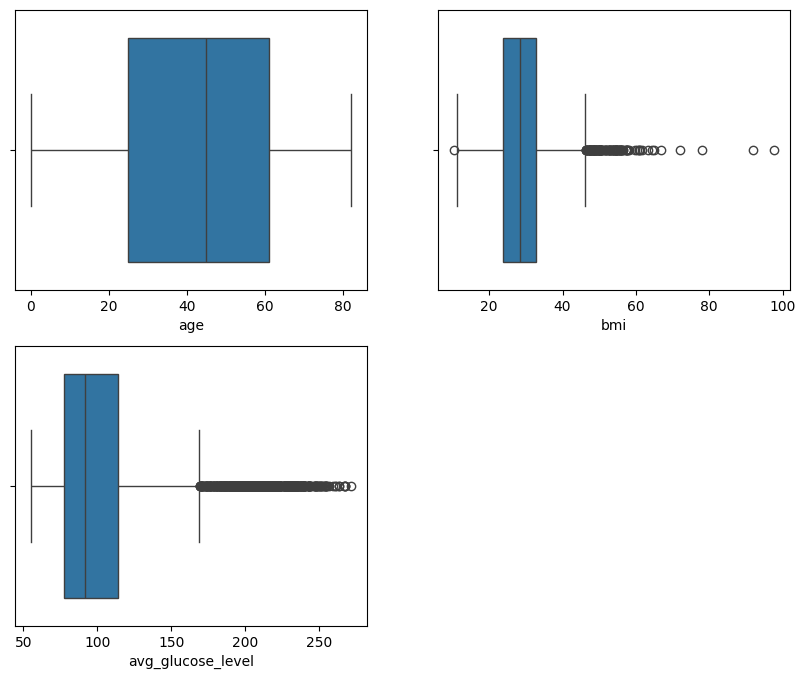

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(x=stroke.age)

plt.subplot(2,2,2)
sns.boxplot(x=stroke.bmi)

plt.subplot(2,2,3)
sns.boxplot(x=stroke.avg_glucose_level)

plt.show()



In [ ]:

def remove_outliers(col_name):

  global stroke
  Q1=stroke[col_name].quantile(.25)
  Q3=stroke[col_name].quantile(.75)
  IQR=Q3-Q1

  lower=Q1 - 1.5*IQR
  upper=Q3 + 1.5*IQR

  stroke_without_outliers=stroke[(stroke[col_name]>=lower) & (stroke[col_name]<=upper)]
  stroke=stroke_without_outliers.copy()
  return stroke[col_name]


In [ ]:
remove_outliers('bmi')

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 4984, dtype: float64

In [ ]:
remove_outliers('avg_glucose_level')

2       105.92
6        70.09
7        94.39
8        76.15
9        58.57
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 4390, dtype: float64

**Data Visualization**

In [ ]:
stroke['age']=stroke.age.astype('int32')


In [ ]:
stroke['agegrp']=pd.cut(stroke.age,[0,10,20,30,40,50,60,70,80,90])

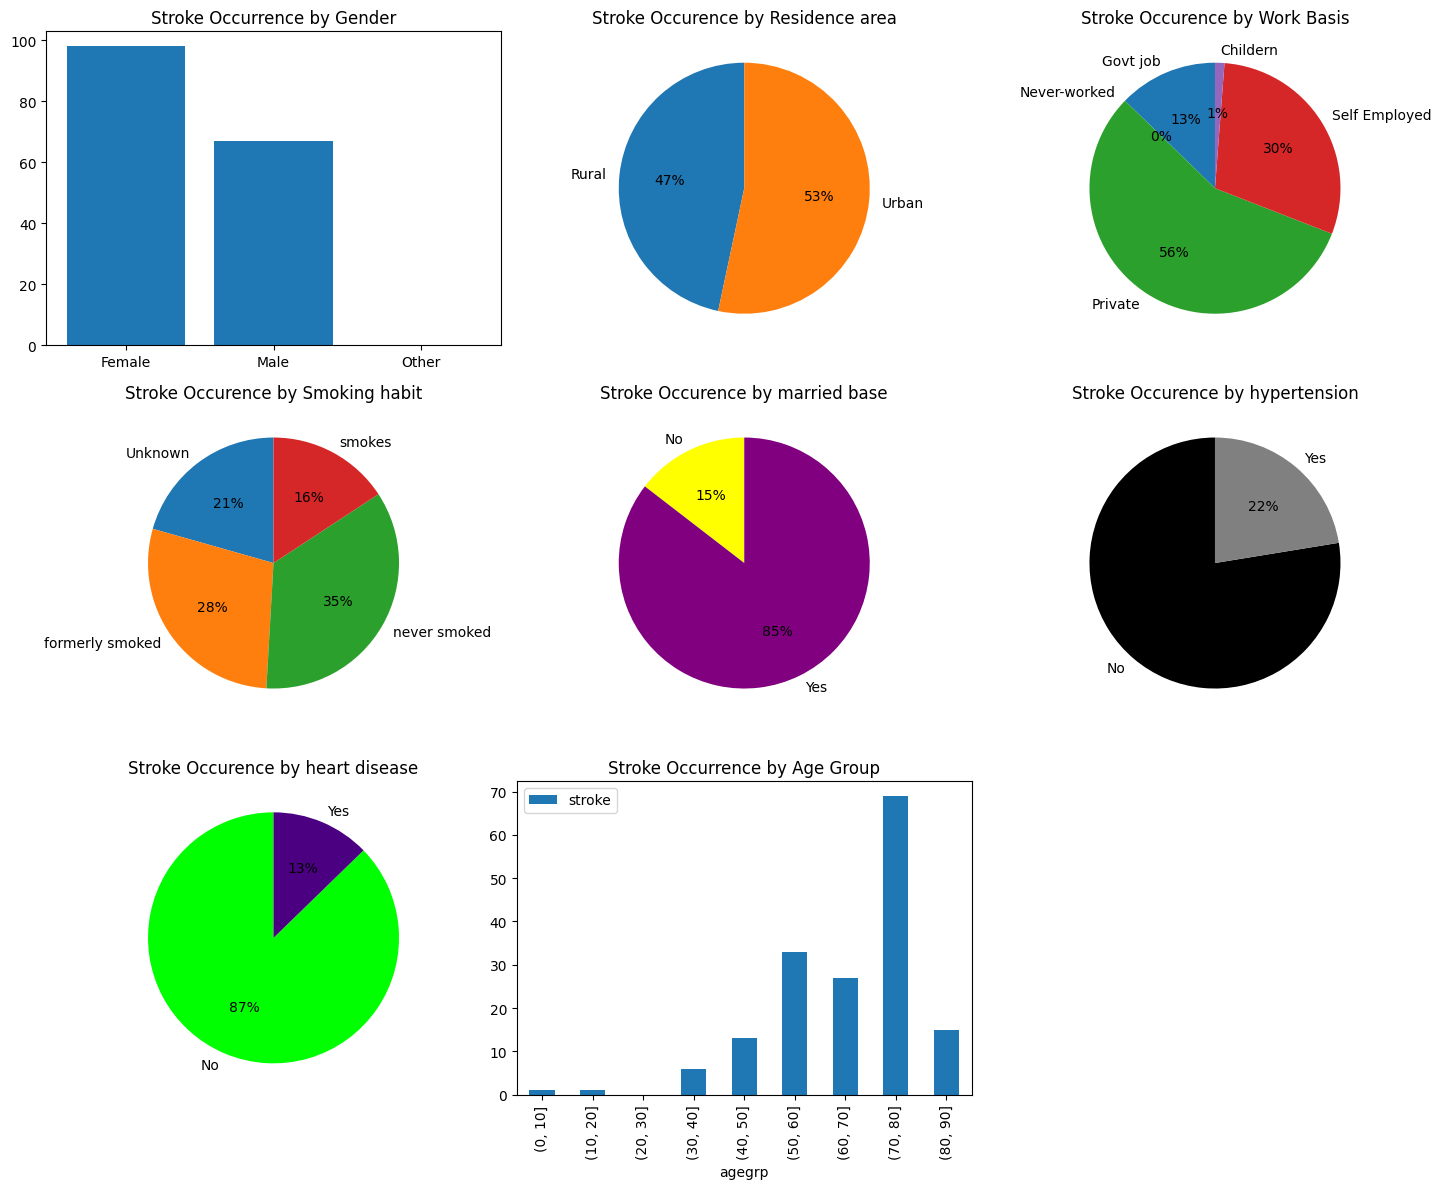

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,12))

gender_based=stroke.groupby('gender').agg({'stroke':'sum'})
ax[0][0].bar(
    gender_based.index,
    gender_based.stroke,

)
ax[0][0].set_title('Stroke Occurrence by Gender')

residence_based=stroke.groupby('Residence_type').agg({'stroke':'sum'},axis=1)
ax[0][1].pie(
    x=residence_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['Rural','Urban']
)
ax[0][1].set_title('Stroke Occurence by Residence area')

work_based=stroke.groupby('work_type').agg({'stroke':'sum'},axis=1)
ax[0][2].pie(
    x=work_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['Childern','Self Employed','Private','Never-worked','Govt job'][::-1]
)
ax[0][2].set_title('Stroke Occurence by Work Basis')

smoking_based=stroke.groupby('smoking_status').agg({'stroke':'sum'},axis=1)
ax[1][0].pie(
    x=smoking_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['Unknown','formerly smoked','never smoked','smokes']
)
ax[1][0].set_title('Stroke Occurence by Smoking habit')

married_based=stroke.groupby('ever_married').agg({'stroke':'sum'},axis=1)
ax[1][1].pie(
    x=married_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['No','Yes'],
    colors=['yellow','purple']

)
ax[1][1].set_title('Stroke Occurence by married base')

hypertension_based=stroke.groupby('hypertension').agg({'stroke':'sum'},axis=1)
ax[1][2].pie(
    x=hypertension_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['No','Yes'],
    colors=['black','gray']

)
ax[1][2].set_title('Stroke Occurence by hypertension')

heart_disease_based=stroke.groupby('heart_disease').agg({'stroke':'sum'},axis=1)
ax[2][0].pie(
    x=heart_disease_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['No','Yes'],
    colors=['lime','indigo']
)
ax[2][0].set_title('Stroke Occurence by heart disease')

stroke.groupby('agegrp').agg({'stroke': 'sum'}, axis=1).plot(kind='bar', ax=ax[2][1])
ax[2][1].set_title('Stroke Occurrence by Age Group')

ax[2][2].axis('off')

plt.tight_layout()



In [ ]:
stroke.heart_disease.value_counts()

0    4218
1     172
Name: heart_disease, dtype: int64

In [ ]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agegrp
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,"(70, 80]"
6,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,"(70, 80]"
7,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,"(60, 70]"
8,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,"(50, 60]"
9,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,"(70, 80]"


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

label_mapping = {}
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    stroke[column] = label_encoder.fit_transform(stroke[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agegrp
2,1,80,0,1,1,2,0,105.92,32.500000,2,1,"(70, 80]"
6,1,74,1,1,1,2,0,70.09,27.400000,2,1,"(70, 80]"
7,0,69,0,0,0,2,1,94.39,22.800000,2,1,"(60, 70]"
8,0,59,0,0,1,2,0,76.15,28.893237,0,1,"(50, 60]"
9,0,78,0,0,1,2,1,58.57,24.200000,0,1,"(70, 80]"


In [ ]:
for column, mapping in label_mapping.items():
    print(f"Mapping for {column}:\n", mapping)

Mapping for gender:
 {'Female': 0, 'Male': 1, 'Other': 2}
Mapping for ever_married:
 {'No': 0, 'Yes': 1}
Mapping for work_type:
 {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Mapping for Residence_type:
 {'Rural': 0, 'Urban': 1}
Mapping for smoking_status:
 {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [ ]:
def chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p, dof, expected

categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

chi_square_results = {}
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        chi2, p, dof, expected = chi_square_test(stroke, var1, var2)
        chi_square_results[(var1, var2)] = {'chi2': chi2, 'p-value': p, 'degrees_of_freedom': dof, 'expected_freq': expected}

for pair, result in chi_square_results.items():
    print(f"Chi-square test result for {pair}:")
    print(f"Chi-square statistic: {result['chi2']}")
    print(f"p-value: {result['p-value']}")
    print(f"Degrees of freedom: {result['degrees_of_freedom']}")
    print(f"Expected frequencies:\n{result['expected_freq']}\n")

Chi-square test result for ('gender', 'ever_married'):
Chi-square statistic: 10.529183345270328
p-value: 0.005171504263961697
Degrees of freedom: 2
Expected frequencies:
[[9.76412301e+02 1.61358770e+03]
 [6.78210706e+02 1.12078929e+03]
 [3.76993166e-01 6.23006834e-01]]

Chi-square test result for ('gender', 'work_type'):
Chi-square statistic: 49.68380325790105
p-value: 4.700218965731071e-08
Degrees of freedom: 8
Expected frequencies:
[[3.25667426e+02 1.29794989e+01 1.46373349e+03 3.89974943e+02
  3.97644647e+02]
 [2.26206834e+02 9.01548975e+00 1.01670137e+03 2.70874487e+02
  2.76201822e+02]
 [1.25740319e-01 5.01138952e-03 5.65148064e-01 1.50569476e-01
  1.53530752e-01]]

Chi-square test result for ('gender', 'Residence_type'):
Chi-square statistic: 1.1128820576116087
p-value: 0.573245602294135
Degrees of freedom: 2
Expected frequencies:
[[1.27494077e+03 1.31505923e+03]
 [8.85566970e+02 9.13433030e+02]
 [4.92255125e-01 5.07744875e-01]]

Chi-square test result for ('gender', 'smoking_sta

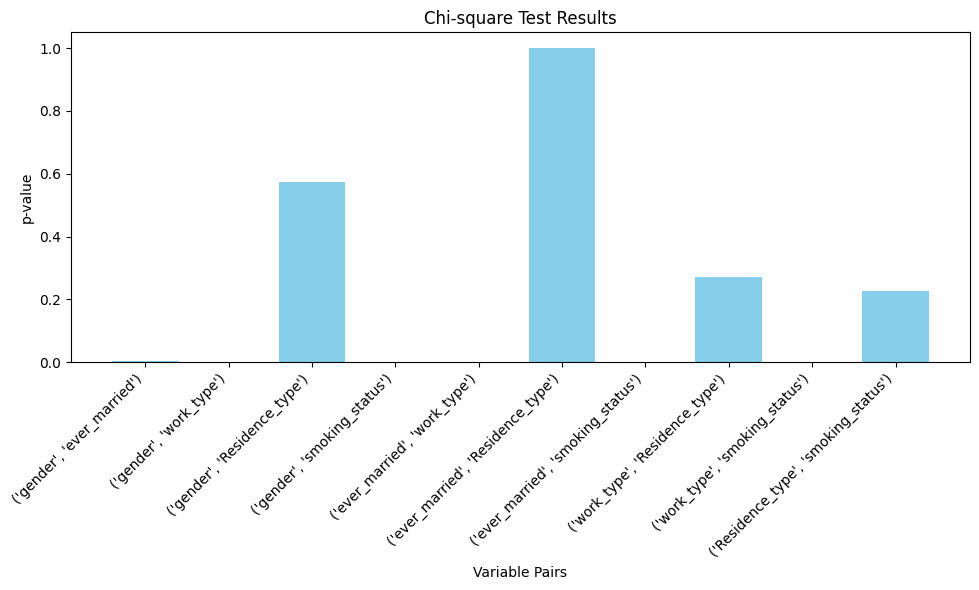

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

chi_square_results = {}
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        chi2, p, dof, expected = chi_square_test(stroke, var1, var2)
        chi_square_results[(var1, var2)] = {'chi2': chi2, 'p-value': p, 'degrees_of_freedom': dof, 'expected_freq': expected}

p_values = [result['p-value'] for result in chi_square_results.values()]

plt.figure(figsize=(10, 6))
plt.bar(range(len(p_values)), p_values, align='center', color='skyblue')
plt.xticks(range(len(p_values)), chi_square_results.keys(), rotation=45, ha='right')
plt.title('Chi-square Test Results')
plt.xlabel('Variable Pairs')
plt.ylabel('p-value')
plt.tight_layout()
plt.show()


**Feature and Target selection**

In [ ]:
x=stroke.drop(['stroke','agegrp','ever_married'],axis=1)

y=stroke.stroke

**Data Splitting**

In [ ]:
from sklearn.model_selection import *
X_train , X_test , Y_train ,Y_test = train_test_split(x,y,test_size = .20)

**KNN**

In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):

        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]


        k_indices = np.argsort(distances)[:self.k]


        k_nearest_labels = [self.y_train[i] for i in k_indices]


        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


x_train_np = X_train.to_numpy()
x_test_np = X_test.to_numpy()
y_train_np = Y_train.to_numpy()
y_test_np = Y_test.to_numpy()


knn_model = KNN(k=3)
knn_model.fit(x_train_np, y_train_np)


predictions = knn_model.predict(x_test_np)


accuracy = np.mean(predictions == y_test_np)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9567198177676538


Accuracy for k=1: 0.929384965831435
Accuracy for k=2: 0.958997722095672
Accuracy for k=3: 0.9567198177676538
Accuracy for k=4: 0.9646924829157175
Accuracy for k=5: 0.9635535307517085
Accuracy for k=6: 0.9646924829157175
Accuracy for k=7: 0.9635535307517085
Accuracy for k=8: 0.9646924829157175
Accuracy for k=9: 0.9635535307517085
Accuracy for k=10: 0.9646924829157175
Accuracy for k=11: 0.9646924829157175
Accuracy for k=12: 0.9646924829157175
Accuracy for k=13: 0.9646924829157175
Accuracy for k=14: 0.9646924829157175
Accuracy for k=15: 0.9646924829157175
Accuracy for k=16: 0.9646924829157175
Accuracy for k=17: 0.9646924829157175
Accuracy for k=18: 0.9646924829157175
Accuracy for k=19: 0.9646924829157175
Accuracy for k=20: 0.9646924829157175


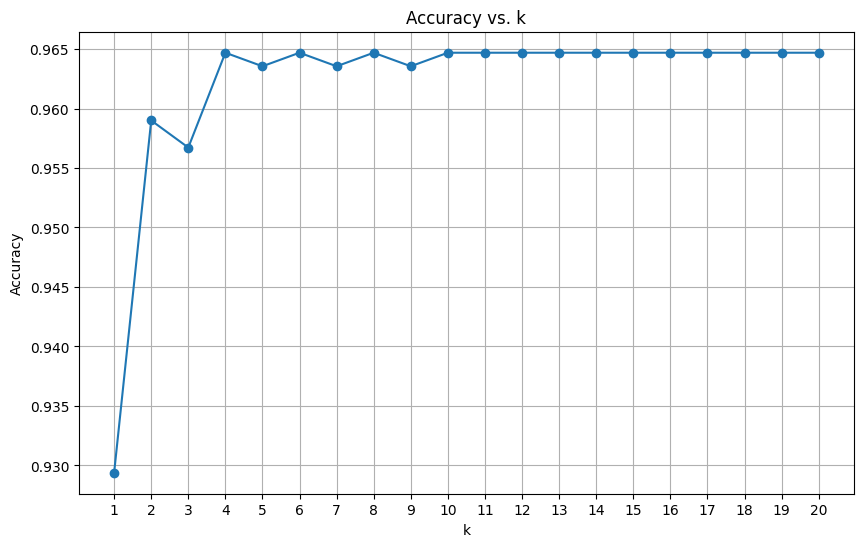

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Convert pandas DataFrames to numpy arrays
x_train_np = X_train.to_numpy()
x_test_np = X_test.to_numpy()
y_train_np = Y_train.to_numpy()
y_test_np = Y_test.to_numpy()

# Initialize list to store accuracy values for different values of k
accuracies = []

# Loop through different values of k
for k in range(1, 21):
    # Create and fit KNN model
    knn_model = KNN(k=k)
    knn_model.fit(x_train_np, y_train_np)

    # Make predictions
    predictions = knn_model.predict(x_test_np)

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test_np)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


Average accuracy for k=1: 0.9322350690771743
Average accuracy for k=2: 0.9572900836058731
Average accuracy for k=3: 0.9515969410706253
Average accuracy for k=4: 0.9598537809064126
Average accuracy for k=5: 0.9567206882996357
Average accuracy for k=6: 0.9595684753579491
Average accuracy for k=7: 0.9575753891543364
Average accuracy for k=8: 0.960707671233987
Average accuracy for k=9: 0.960707671233987
Average accuracy for k=10: 0.9609925715188872
Average accuracy for k=11: 0.9604227709490868
Average accuracy for k=12: 0.9612770665402245
Average accuracy for k=13: 0.9601382759277495
Average accuracy for k=14: 0.9618464618464617
Average accuracy for k=15: 0.9618464618464617
Average accuracy for k=16: 0.9618464618464617
Average accuracy for k=17: 0.9615619668251247
Average accuracy for k=18: 0.9615619668251247
Average accuracy for k=19: 0.9615619668251247
Average accuracy for k=20: 0.9618464618464617


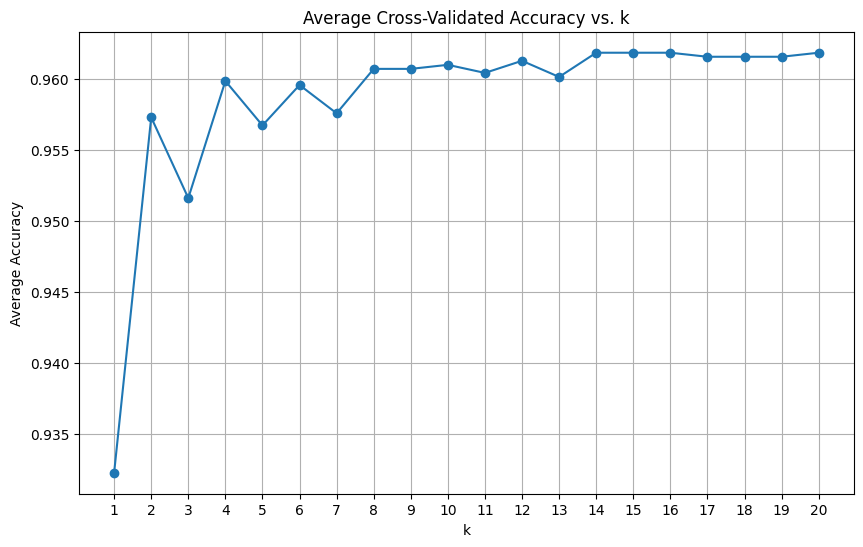

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Convert pandas DataFrames to numpy arrays
x_train_np = X_train.to_numpy()
x_test_np = X_test.to_numpy()
y_train_np = Y_train.to_numpy()
y_test_np = Y_test.to_numpy()

# Initialize list to store accuracy values for different values of k
accuracies = []

# Define range of k values
k_values = range(1, 21)

# Initialize KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through different values of k
for k in k_values:
    fold_accuracies = []
    for train_index, test_index in kf.split(x_train_np):
        # Split data into train and validation sets
        X_train_fold, X_val_fold = x_train_np[train_index], x_train_np[test_index]
        y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[test_index]

        # Create and fit KNN model
        knn_model = KNN(k=k)
        knn_model.fit(X_train_fold, y_train_fold)

        # Make predictions
        predictions = knn_model.predict(X_val_fold)

        # Calculate accuracy for this fold
        fold_accuracy = np.mean(predictions == y_val_fold)
        fold_accuracies.append(fold_accuracy)

    # Calculate average accuracy across all folds
    average_accuracy = np.mean(fold_accuracies)
    accuracies.append(average_accuracy)
    print(f"Average accuracy for k={k}: {average_accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Average Cross-Validated Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Average accuracy for k=1 and distance metric 'euclidean': 0.9322350690771743
Average accuracy for k=2 and distance metric 'euclidean': 0.9572900836058731
Average accuracy for k=3 and distance metric 'euclidean': 0.9515969410706253
Average accuracy for k=4 and distance metric 'euclidean': 0.9598537809064126
Average accuracy for k=5 and distance metric 'euclidean': 0.9567206882996357
Average accuracy for k=6 and distance metric 'euclidean': 0.9595684753579491
Average accuracy for k=7 and distance metric 'euclidean': 0.9575753891543364
Average accuracy for k=8 and distance metric 'euclidean': 0.960707671233987
Average accuracy for k=9 and distance metric 'euclidean': 0.960707671233987
Average accuracy for k=10 and distance metric 'euclidean': 0.9609925715188872
Average accuracy for k=11 and distance metric 'euclidean': 0.9604227709490868
Average accuracy for k=12 and distance metric 'euclidean': 0.9612770665402245
Average accuracy for k=13 and distance metric 'euclidean': 0.96013827592774

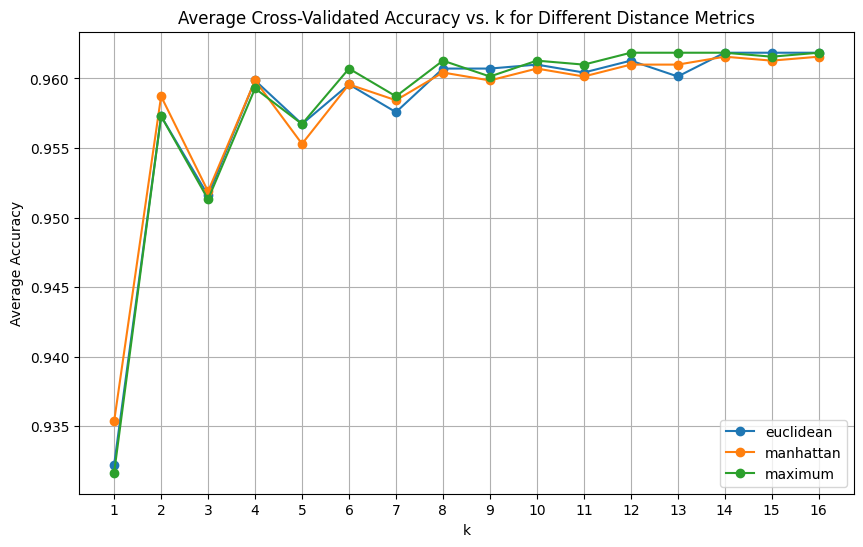

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2)**2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance_metric == 'maximum':
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError("Invalid distance metric. Supported metrics are 'euclidean', 'manhattan', and 'maximum'.")

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Convert pandas DataFrames to numpy arrays
x_train_np = X_train.to_numpy()
x_test_np = X_test.to_numpy()
y_train_np = Y_train.to_numpy()
y_test_np = Y_test.to_numpy()

# Initialize list to store accuracy values for different values of k and distance metrics
accuracies = {'euclidean': [], 'manhattan': [], 'maximum': []}

# Define range of k values
k_values = range(1, 17)

# Initialize KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through different values of k and distance metrics
for distance_metric in ['euclidean', 'manhattan', 'maximum']:
    for k in k_values:
        fold_accuracies = []
        for train_index, test_index in kf.split(x_train_np):
            # Split data into train and validation sets
            X_train_fold, X_val_fold = x_train_np[train_index], x_train_np[test_index]
            y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[test_index]

            # Create and fit KNN model
            knn_model = KNN(k=k, distance_metric=distance_metric)
            knn_model.fit(X_train_fold, y_train_fold)

            # Make predictions
            predictions = knn_model.predict(X_val_fold)

            # Calculate accuracy for this fold
            fold_accuracy = np.mean(predictions == y_val_fold)
            fold_accuracies.append(fold_accuracy)

        # Calculate average accuracy across all folds
        average_accuracy = np.mean(fold_accuracies)
        accuracies[distance_metric].append(average_accuracy)
        print(f"Average accuracy for k={k} and distance metric '{distance_metric}': {average_accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
for distance_metric, accuracy_values in accuracies.items():
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-', label=distance_metric)
plt.title('Average Cross-Validated Accuracy vs. k for Different Distance Metrics')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


**Naive Bayes Classifier**

In [ ]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.class_probabilities = None
        self.feature_params = None
        self.feature_probabilities = None
        self.classes = None

    def gaussian_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean)**2) / (2 * std**2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def fit_continuous(self, X, y):
        self.class_probabilities = {}
        self.feature_params = {}
        self.classes = np.unique(y)

        for c in self.classes:
            X_c = X[y == c]
            self.class_probabilities[c] = len(X_c) / len(X)


            means = np.mean(X_c, axis=0)
            stds = np.std(X_c, axis=0)

            self.feature_params[c] = {'mean': means, 'std': stds}

    def fit_discrete(self, X, y):
        self.class_probabilities = {}
        self.feature_probabilities = {}
        self.classes = np.unique(y)

        for c in self.classes:
            X_c = X[y == c]
            self.class_probabilities[c] = len(X_c) / len(X)

            feature_probabilities = (X_c.sum(axis=0) + 1) / (len(X_c) + 2)
            self.feature_probabilities[c] = feature_probabilities

    def predict_continuous(self, x):
        probabilities = []

        for c in self.classes:
            class_probability = np.log(self.class_probabilities[c])

            for i in range(len(x)):
                mean = self.feature_params[c]['mean'][i]
                std = self.feature_params[c]['std'][i]


                log_likelihood = np.log(self.gaussian_probability(x[i], mean, std))
                class_probability += log_likelihood

            probabilities.append(class_probability)

        return self.classes[np.argmax(probabilities)]

    def predict_discrete(self, x):
        probabilities = []

        for c in self.classes:
            class_probability = np.log(self.class_probabilities[c])

            for i in range(len(x)):

                log_likelihood = np.log(self.feature_probabilities[c][i])
                class_probability += log_likelihood

            probabilities.append(class_probability)

        return self.classes[np.argmax(probabilities)]

    def predict(self, X):
        if isinstance(X[0][0], (int, float)):
            return np.array([self.predict_continuous(x) for x in X])
        else:
            return np.array([self.predict_discrete(x) for x in X])


nb_model = NaiveBayes()
nb_model.fit_continuous(x_train_np, y_train_np)


predictions = nb_model.predict(x_test_np)

accuracy = np.mean(predictions == y_test_np)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9020501138952164


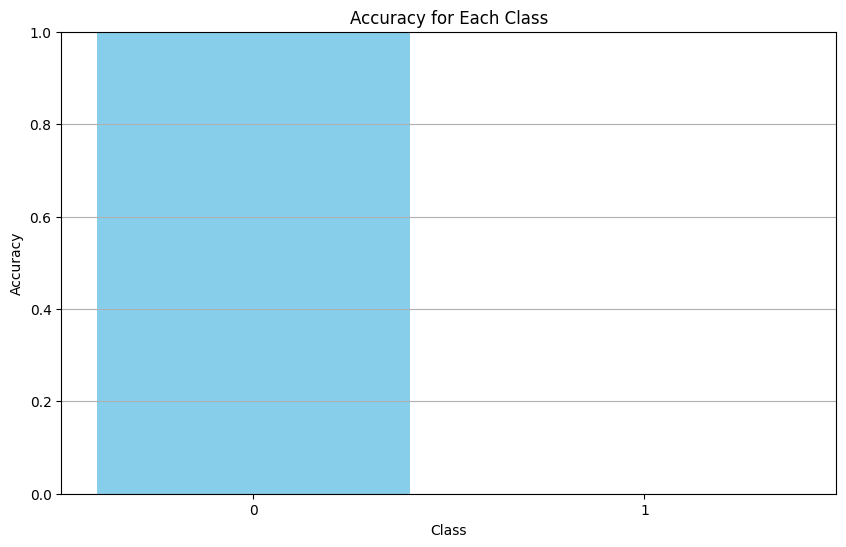

In [ ]:
import matplotlib.pyplot as plt

# Define the classes
classes = np.unique(y_test_np)

# Calculate accuracy for each class
class_accuracies = []
for c in classes:
    class_indices = (y_test_np == c)
    class_predictions = predictions[class_indices]
    class_labels = y_test_np[class_indices]
    class_accuracy = np.mean(class_predictions == class_labels)
    class_accuracies.append(class_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracies, color='skyblue')
plt.title('Accuracy for Each Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(classes)
plt.grid(axis='y')
plt.show()
